In [1]:
''' SET UP '''

# math
import numpy as np

# visualisation
from pandas import DataFrame
import matplotlib.pyplot as plt
import cv2
plt.style.use("seaborn")
%matplotlib inline

# the actuall algorithm, documantation in SOM.py
from SOM import *

# random data-set generator more info in genData.py
from data import genData
seed = 637120124
genData.def_seed = seed

# note: in this notebook we show the best results after already experimenting
# with the pharameters, it's heavy enough anyway

### trying the algorithm on a data-set of uniformaly distrabuted points on a 2 dimentional unit circle

In [2]:
data = genData.create_A1(4000, seed)
DataFrame([data[:, 0], data[:, 1]]).T.rename(columns = {0: 'x', 1:'y'})

,x,y
0,0.214807,0.582827
1,0.140951,0.688881
2,0.220231,0.387314
3,0.045678,0.444978
4,0.323191,0.776918
...,...,...
3995,0.466572,0.894610
3996,0.203545,0.529740
3997,0.386216,0.062814
3998,0.209436,0.325687


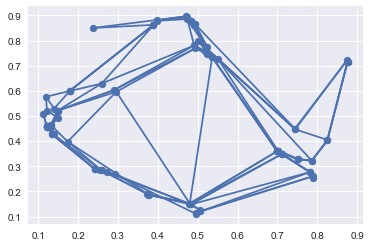


iteration: 4000



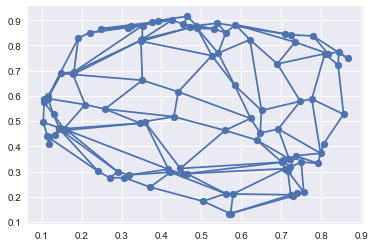


iteration: 8000



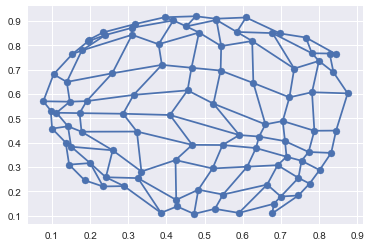


iteration: 12000



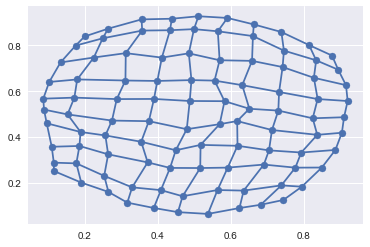


iteration: 16000



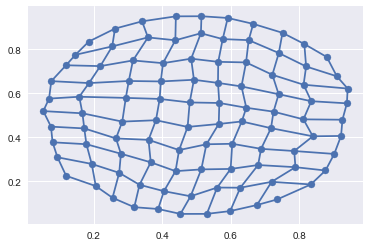


iteration: 20000



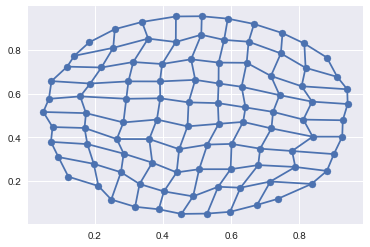


iteration: 24000



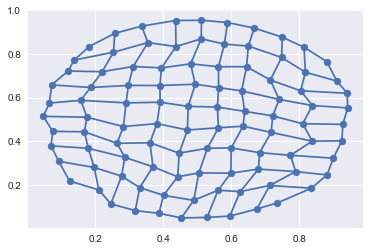


iteration: 28000



In [3]:
som = SOM((10, 10), 0.7, 2, np.zeros(2))
som.train(data, 0.001, 4)

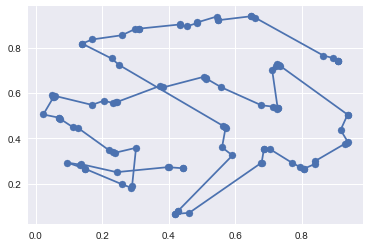


iteration: 4000



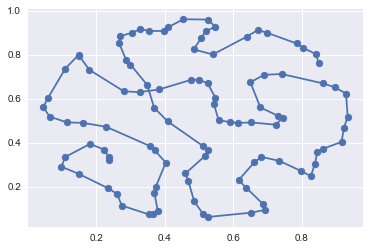


iteration: 8000



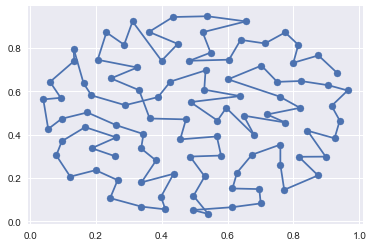


iteration: 12000



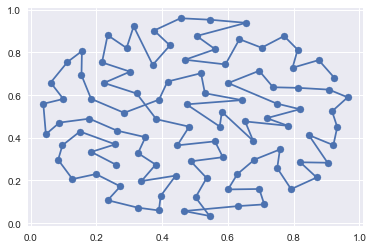


iteration: 16000



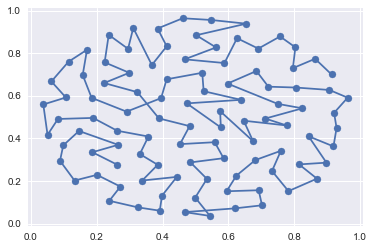


iteration: 20000



In [4]:
som = SOM((100,), 0.7, 2, np.zeros(2))
som.train(data, 0.001, 2)

### trying the algorithm on a data-set of NON-uniformaly distrabuted points on a 2 dimentional unit circle

In [5]:
data = genData.create_A2(size = 3000, seed = seed, rng_type = "power", a=8)
DataFrame([data[:, 0], data[:, 1]]).T.rename(columns = {0: 'x', 1:'y'})

,x,y
0,0.320071,0.096262
1,0.866164,0.285703
2,0.421395,0.875247
3,0.825016,0.819703
4,0.031446,0.449635
...,...,...
2995,0.960183,0.422703
2996,0.606751,0.044761
2997,0.433469,0.908469
2998,0.068618,0.735502


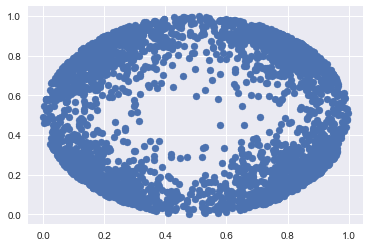

In [6]:
# this is what it looks like

plt.scatter(data[:,0], data[:,1])
plt.show()

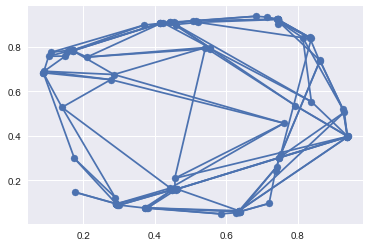


iteration: 3000



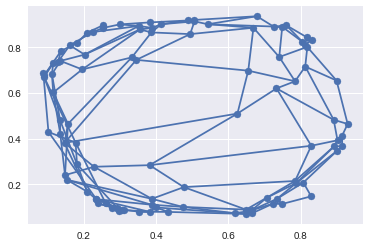


iteration: 6000



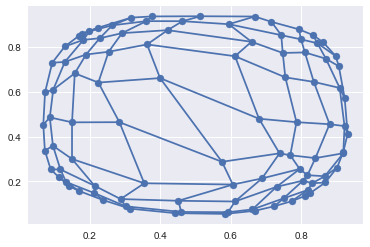


iteration: 9000



In [7]:
som = SOM((10, 10), 0.7, 2, np.zeros(2))
som.train(data, 0.001, 3)

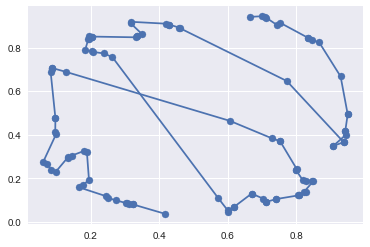


iteration: 3000



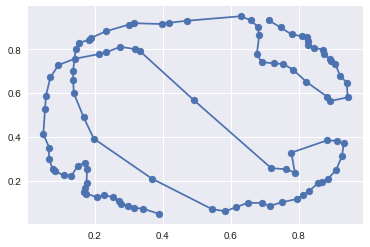


iteration: 6000



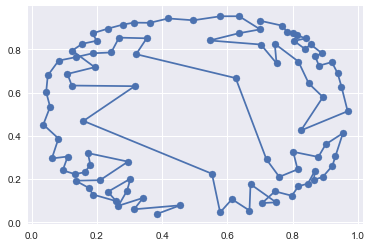


iteration: 9000



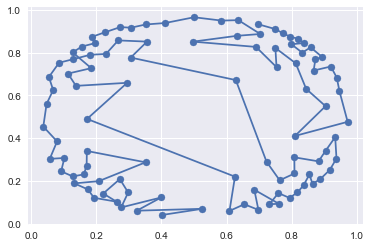


iteration: 12000



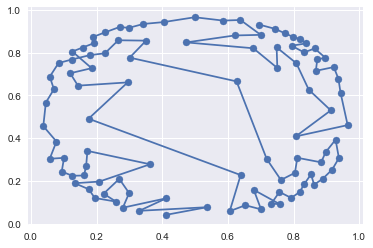


iteration: 15000



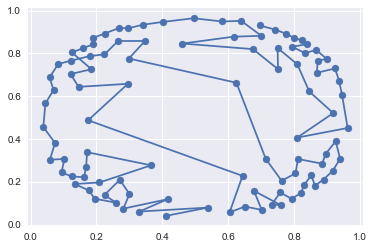


iteration: 18000



In [8]:
som = SOM((100,), 0.7, 2, np.zeros(2))
som.train(data, 0.001, 2)

##### here is another example of the algorithm's prephormance on a non-uniformaly distrabuted data-set

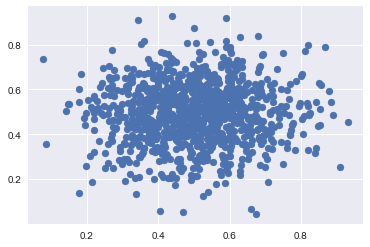

In [9]:
data = genData.create_A2(size = 1000, seed = seed, rng_type = "normal", scale = 0.14)
plt.scatter(data[:,0], data[:,1])
plt.show()

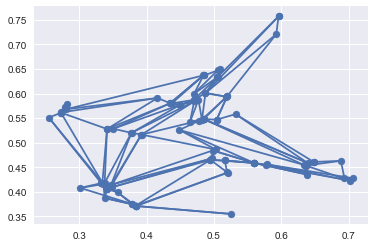


iteration: 1000



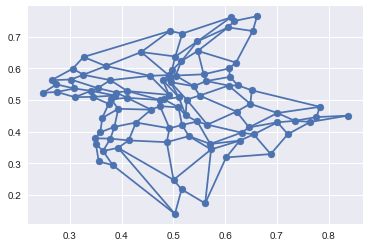


iteration: 2000



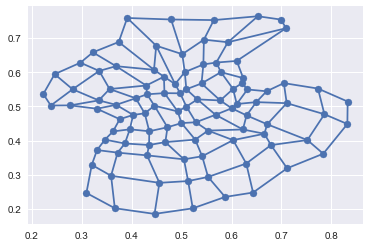


iteration: 3000



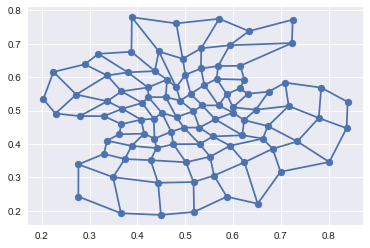


iteration: 4000



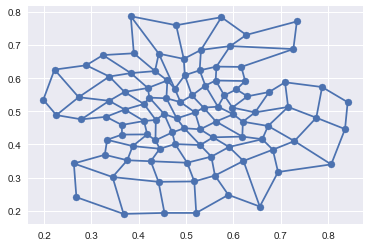


iteration: 5000



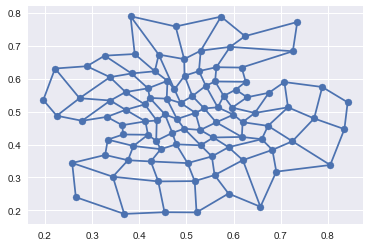


iteration: 6000



In [10]:
som = SOM((10, 10), 0.7, 2, np.zeros(2))
som.train(data, 0.001, 3)

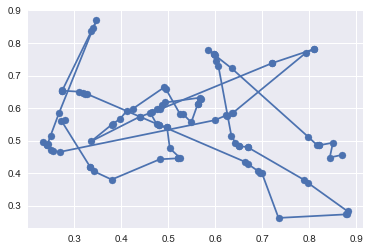


iteration: 1000



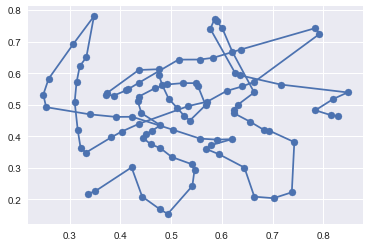


iteration: 2000



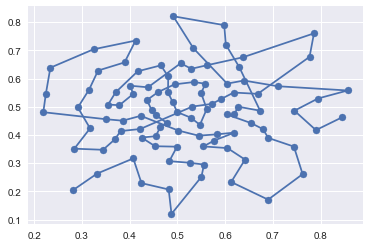


iteration: 3000



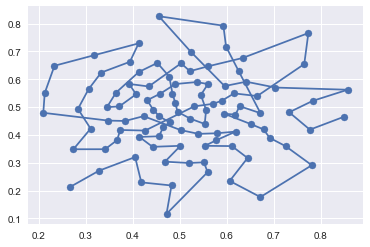


iteration: 4000



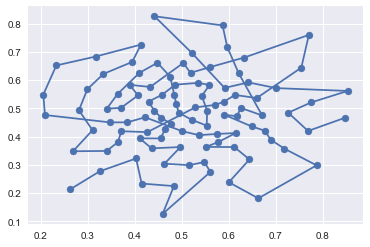


iteration: 5000



In [11]:
som = SOM((100,), 0.7, 2, np.zeros(2))
som.train(data, 0.001, 2)

### trying the algorithm on a data-set of uniformaly distrabuted points on a 2 dimentional ring.  this time the centroids have closed topology

In [12]:
data = genData.create_A3(2500, seed)
DataFrame([data[:, 0], data[:, 1]]).T.rename(columns = {0: 'x', 1:'y'})

,x,y
0,-1.436197,0.755523
1,-1.817287,-0.220086
2,-0.769035,1.207095
3,0.051860,-1.429640
4,-0.732752,-1.728924
...,...,...
2495,1.782908,0.470076
2496,1.529370,0.129433
2497,0.082328,-1.954485
2498,1.453126,0.389720


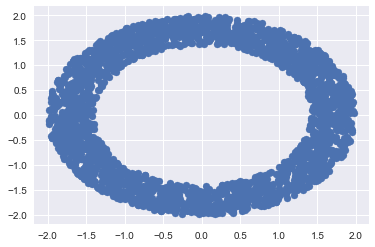

In [13]:
# this is what it looks like

plt.scatter(data[:,0], data[:,1])
plt.show()

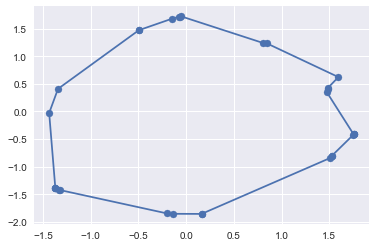


iteration: 2500



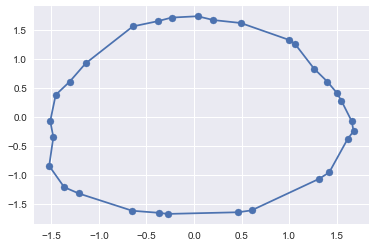


iteration: 5000



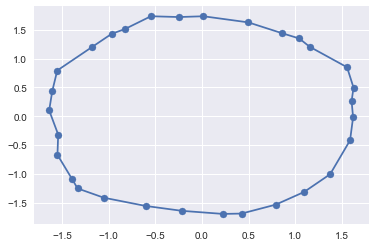


iteration: 7500



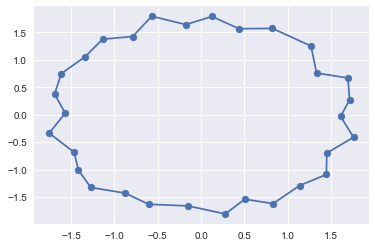


iteration: 10000



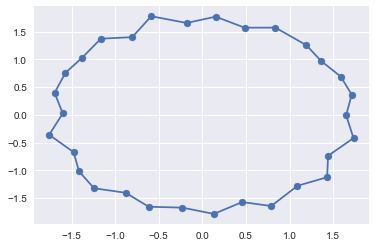


iteration: 12500



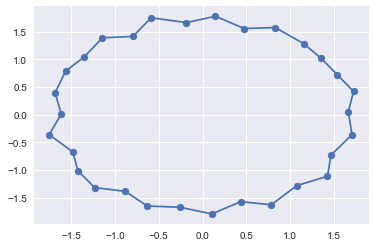


iteration: 15000



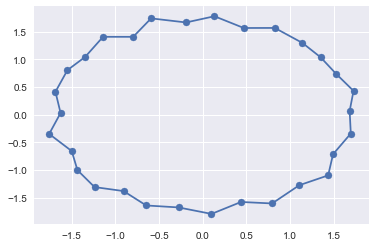


iteration: 17500



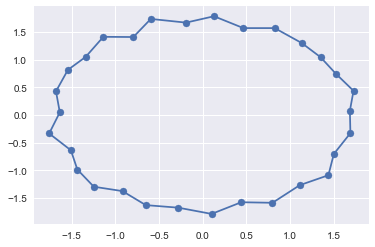


iteration: 20000



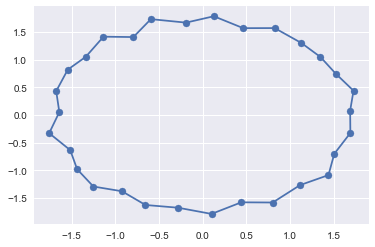


iteration: 22500



In [14]:
som = SOM((30,), 0.8, 2, np.zeros(2), True)
som.train(data, 0.002, 3)

### challenging the algorithm to pick up on hand's structure

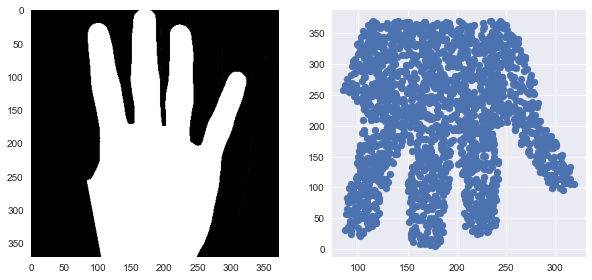

In [15]:
data = genData.create_B(size = 2000,seed=seed, img = "data/hand1.png")
img = cv2.imread("data/hand1.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (10, 10))
plt.grid(False)
plt.subplot(2,2,1)
plt.imshow(img)
plt.grid(False)
plt.subplot(2,2,2)
plt.scatter(data[:,0], data[:,1])
plt.show()


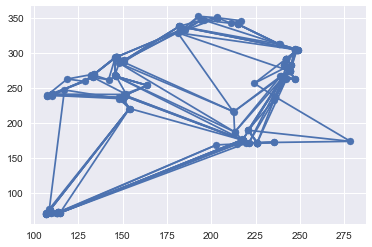


iteration: 2000



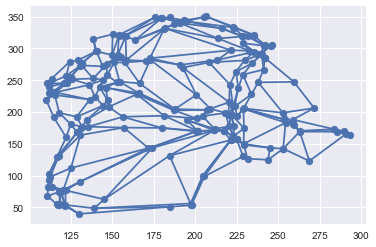


iteration: 4000



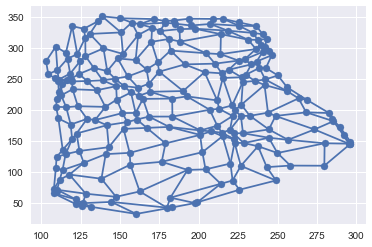


iteration: 6000



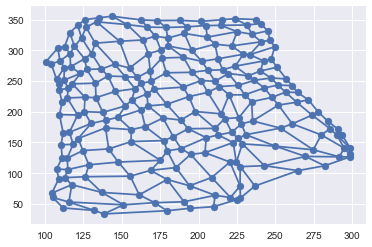


iteration: 8000



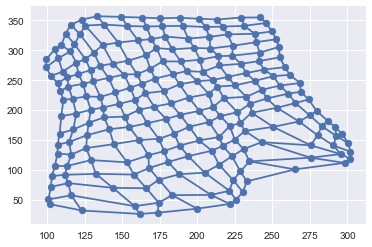


iteration: 10000



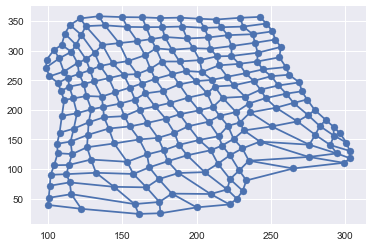


iteration: 12000



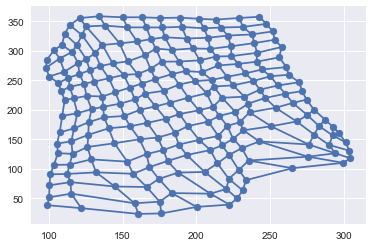


iteration: 14000



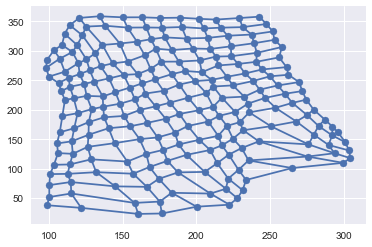


iteration: 16000



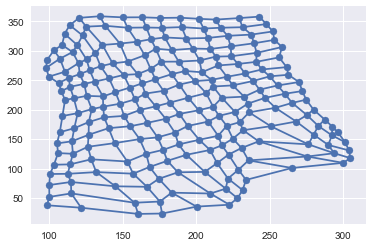


iteration: 18000



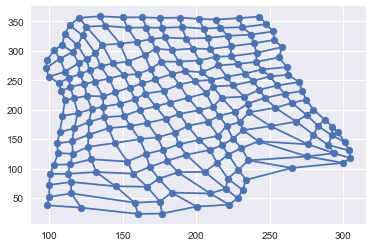


iteration: 20000



In [16]:
som = SOM((15, 15), 0.7, 2, np.zeros(2))
som.train(data, 0.01, 5)

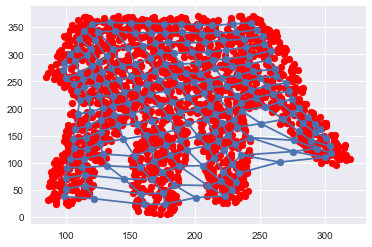

In [17]:
plt.scatter(data[:,0], data[:,1],c="r")
som.display(ax=plt.gca())


#### what would happen if we cut one of the fingures off and cary on ?

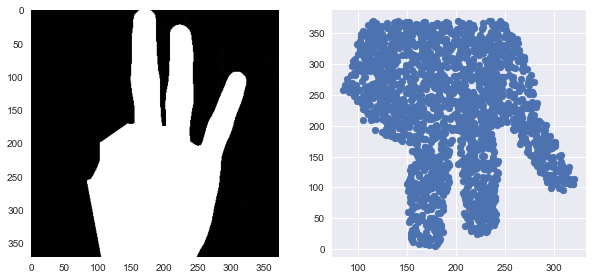

In [18]:
data = genData.create_B(size = 2000,seed=seed, img = "data/hand2.png")
img = cv2.imread("data/hand2.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
plt.imshow(img)
plt.grid(False)
plt.subplot(2,2,2)
plt.scatter(data[:,0], data[:,1])
plt.show()


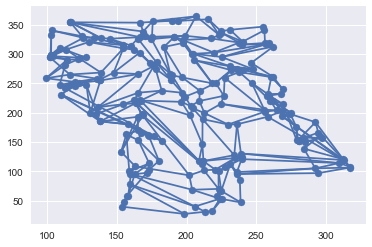


iteration: 2000



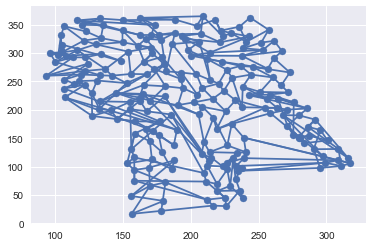


iteration: 4000



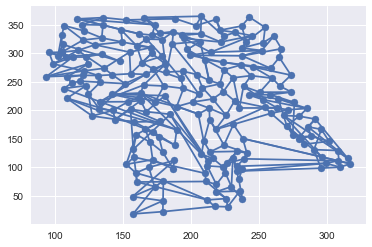


iteration: 6000



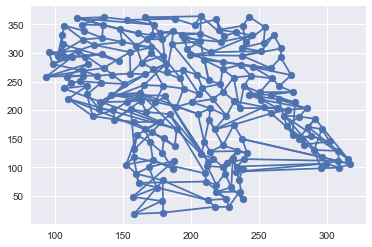


iteration: 8000



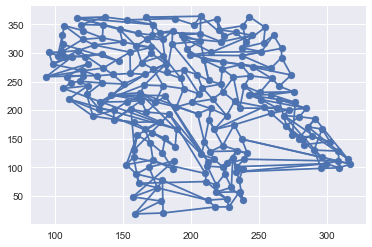


iteration: 10000



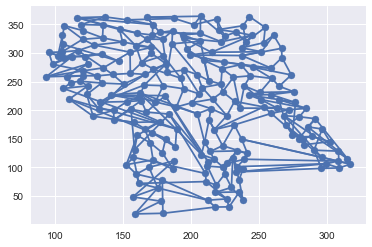


iteration: 12000



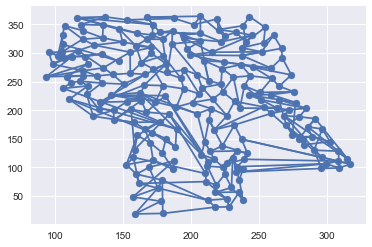


iteration: 14000



In [20]:
som.train(data, 0.01, 1)

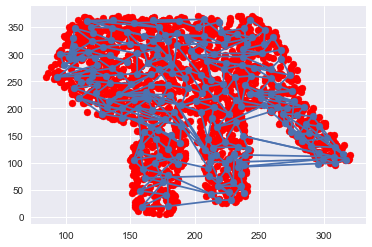

In [21]:
plt.scatter(data[:,0], data[:,1],c="r")
som.display(ax=plt.gca())
plt.show()

In [22]:
# the centroids of the cut fingure latched on the neighbouring one !
# although we do see some damage to the equal distrabution of centroids among the data-set